### Este nb será usado para analisar e criar um modelo para predição de churn em uma base de telespectadores da twitch em determinado canal

### Será usada a metodologia SEMMA
#### S: Sample
#### E: Explore
#### M: Modify
#### M: Model
#### A: Assess

## Import libs

In [ ]:
import pandas as pd

from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn import ensemble   
from sklearn import tree
from sklearn import pipeline

from feature_engine import discretisation, encoding

import mlflow
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)


In [109]:
df = pd.read_csv("data/abt_churn.csv")

## Sample

In [110]:
df.head()

,dtRef,idUsuario,qtdeTransacoes,qtdeDias,mediaTransacoesDias,saldoPontos,qtdePontosPos,qtdePontosNeg,qtdeDiasUltimaTransacao,qtdeDiasPrimeiraTransacao,...,saldoPontosD28,qtdePontosPosD28,qtdePontosNegD28,propAvgQtdeTransacoes,propAvgQtdeDias,propAvgMediaTransacoesDias,propAvgSaldoPontos,propAvgQtdePontosPos,propAvgQtdePontosNeg,flagChurn
0,2024-06-01,000ff655-fa9f-4baa-a108-47f581ec52a1,266,27,9.851852,635,2635,-2000,1.0,89.0,...,151,151,0,3.889781,3.278281,2.135602,1.516314,4.101926,8.944444,1
1,2024-10-01,000ff655-fa9f-4baa-a108-47f581ec52a1,268,28,9.571429,686,2686,-2000,4.0,211.0,...,51,51,0,3.309865,2.567615,2.328737,1.288278,2.920954,5.167037,1
2,2024-04-01,000ff655-fa9f-4baa-a108-47f581ec52a1,188,11,17.090909,275,1275,-1000,3.0,28.0,...,275,1275,-1000,3.805468,1.820201,3.739048,0.798622,2.634551,7.162791,0
3,2024-05-01,000ff655-fa9f-4baa-a108-47f581ec52a1,262,24,10.916667,484,2484,-2000,2.0,58.0,...,107,1107,-1000,4.246216,3.255244,2.322640,1.275749,4.275765,9.922414,0
4,2024-08-01,001749bd-37b5-4b1e-8111-f9fbba90f530,1,1,1.000000,50,50,0,21.0,21.0,...,50,50,0,0.013317,0.103973,0.236635,0.104533,0.063302,0.000000,1


In [111]:
df['dtRef'].value_counts().sort_index()

dtRef
2024-03-01    665
2024-04-01    528
2024-05-01    542
2024-06-01    426
2024-07-01    422
2024-08-01    415
2024-09-01    371
2024-10-01    349
2024-11-01    258
2024-12-01    198
2025-01-01    194
2025-02-01    374
2025-03-01    451
2025-04-01    303
Name: count, dtype: int64

In [112]:
# out of time (dado para validação, tipo safra)
# dado do futuro na base atual de dados

oot = df[df['dtRef']==df['dtRef'].max()].copy()
oot

,dtRef,idUsuario,qtdeTransacoes,qtdeDias,mediaTransacoesDias,saldoPontos,qtdePontosPos,qtdePontosNeg,qtdeDiasUltimaTransacao,qtdeDiasPrimeiraTransacao,...,saldoPontosD28,qtdePontosPosD28,qtdePontosNegD28,propAvgQtdeTransacoes,propAvgQtdeDias,propAvgMediaTransacoesDias,propAvgSaldoPontos,propAvgQtdePontosPos,propAvgQtdePontosNeg,flagChurn
8,2025-04-01,0033b737-8235-4c0f-9801-dc4ca185af00,445,25,17.800000,2066,2066,0,6.0,197.0,...,976,976,0,5.463477,2.123061,4.501847,3.989389,2.191048,0.000000,1
21,2025-04-01,0122142b-464c-414a-9aad-e901f492a1a3,23,4,5.750000,121,121,0,7.0,81.0,...,2,2,0,0.282382,0.339690,1.454248,0.233648,0.128324,0.000000,1
53,2025-04-01,0287cd05-1efe-4ad9-b235-ea17e5f8ef9c,303,45,6.733333,3248,3498,-250,1.0,351.0,...,615,615,0,3.720076,3.821510,1.702946,6.271798,3.709722,0.588161,0
61,2025-04-01,02bfd4d9-4dd6-44e5-88b8-2cc08caf3267,338,89,3.797753,3643,7143,-3500,4.0,333.0,...,265,265,0,4.149787,7.558098,0.960500,7.034532,7.575342,8.234250,0
74,2025-04-01,02ebaed5-c07a-4bdd-bb7b-5334d5b25b39,245,51,4.803922,3813,3813,0,18.0,246.0,...,50,50,0,3.007982,4.331045,1.214973,7.362797,4.043788,0.000000,1
83,2025-04-01,03309cb5-124c-4687-9fc6-fa7e76a84aea,23,3,7.666667,23,23,0,12.0,14.0,...,23,23,0,0.282382,0.254767,1.938998,0.044412,0.024392,0.000000,1
110,2025-04-01,03f108c1-e828-46d6-addd-87025871bfa4,963,73,13.191781,11282,11532,-250,1.0,204.0,...,281,281,0,11.823211,6.199339,3.336369,21.785229,12.229994,0.588161,1
116,2025-04-01,03f9edbb-7420-4f36-9a24-894de6aa5678,334,51,6.549020,2525,3525,-1000,11.0,126.0,...,502,502,0,4.100677,4.331045,1.656330,4.875705,3.738357,2.352643,0
119,2025-04-01,04124257-0643-41d9-bc4a-2ed6ad3e27de,7,3,2.333333,154,154,0,1.0,50.0,...,50,50,0,0.085942,0.254767,0.590130,0.297370,0.163321,0.000000,1
130,2025-04-01,044e95f2-8756-42bd-a0a3-d50708beb8da,549,74,7.418919,2257,8257,-6000,6.0,421.0,...,541,541,0,6.740335,6.284261,1.876339,4.358204,8.756769,14.115857,0


In [113]:
# treino

df_train = df[df['dtRef']<df['dtRef'].max()].copy()

In [114]:
# separando features e target

features = df_train.columns[2:-1]
target = 'flagChurn'

X, y = df_train[features], df_train[target]

In [115]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    random_state=42,
                                                                    test_size=0.2,
                                                                    stratify=y # apenas para conjunto de dados pequeno (pode deixar mais lento)
                                                                    )


In [116]:
# verificando se as duas variaveis contem a mesma taxa da variavel resposta.
# ao rodar a primeira vez obteve:
# Taxa variável resposta Treino: 0.4715936446798267 
# Taxa variável resposta Teste: 0.45813282001924927
# resolveu-se então adicionar na função train_test_split o parametro stratify=y
# isso garante que as taxas serão a mais próximas possível.
# apos a adição do parametro, obteve-se:
# Taxa variável resposta Treino: 0.46894559460760715
# Taxa variável resposta Teste: 0.4687199230028874

print(f"Taxa variável resposta Treino: {y_train.mean()}/n/nTaxa variável resposta Teste: {y_test.mean()}")


Taxa variável resposta Treino: 0.46894559460760715/n/nTaxa variável resposta Teste: 0.4687199230028874


## Explore

Aqui será usado apenas a base de treino

In [117]:
# Avaliando se existe algum missing (dados nulos)

X_train.isna().sum().sort_values(ascending=False)

# Caso tenha missing o que fazer:
# Se a coluna tiver muitos missings, excluir a coluna e não as linha.
# 


qtdeTransacoes                0
qtdeDias                      0
mediaTransacoesDias           0
saldoPontos                   0
qtdePontosPos                 0
qtdePontosNeg                 0
qtdeDiasUltimaTransacao       0
qtdeDiasPrimeiraTransacao     0
qtdSkuDistintos               0
qtdeChatMessage               0
qtdePresença                  0
qtdeTrocaStreamElements       0
qtdeChurn                     0
qtdePonei                     0
qtdeAirflowLover              0
qtdePresencaStreak            0
qtdeDailyLoot                 0
qtdeRLover                    0
qtdeVendaItemRPG              0
qtdeTransacoesD7              0
qtdeDiasD7                    0
saldoPontosD7                 0
qtdePontosPosD7               0
qtdePontosNegD7               0
qtdeTransacoesD14             0
qtdeDiasD14                   0
saldoPontosD14                0
qtdePontosPosD14              0
qtdePontosNegD14              0
qtdeTransacoesD28             0
qtdeDiasD28                   0
saldoPon

In [118]:
# Análise bi-variada

# Juntando o df de feature com o target novamente. Apenas para análise. 
df_analise = X_train.copy()
df_analise[target] = y_train
df_analise


,qtdeTransacoes,qtdeDias,mediaTransacoesDias,saldoPontos,qtdePontosPos,qtdePontosNeg,qtdeDiasUltimaTransacao,qtdeDiasPrimeiraTransacao,qtdSkuDistintos,qtdeChatMessage,...,saldoPontosD28,qtdePontosPosD28,qtdePontosNegD28,propAvgQtdeTransacoes,propAvgQtdeDias,propAvgMediaTransacoesDias,propAvgSaldoPontos,propAvgQtdePontosPos,propAvgQtdePontosNeg,flagChurn
1283,3,3,1.000000,150,150,0,10.0,12.0,1,0,...,150,150,0,0.038607,0.289318,0.241858,0.295608,0.174560,0.0,1
3015,12,5,2.400000,257,257,0,6.0,25.0,2,7,...,257,257,0,0.154430,0.482197,0.580460,0.506474,0.299079,0.0,0
3773,47,27,1.740741,1969,1969,0,6.0,98.0,4,19,...,757,757,0,0.640393,2.994404,0.386389,4.361164,2.763287,0.0,0
1823,4,1,4.000000,53,53,0,7.0,7.0,2,3,...,53,53,0,0.080967,0.165473,0.875096,0.153916,0.109515,0.0,1
4577,32,7,4.571429,228,228,0,15.0,107.0,2,28,...,1,1,0,0.395953,0.607107,1.145970,0.439370,0.242994,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,38,13,2.923077,626,626,0,5.0,65.0,2,26,...,207,207,0,0.615863,1.763257,0.621917,1.650039,1.077548,0.0,1
770,2,2,1.000000,100,100,0,11.0,14.0,1,0,...,100,100,0,0.066342,0.539178,0.215391,0.388108,0.340563,0.0,1
1089,2,1,2.000000,51,51,0,3.0,3.0,2,1,...,51,51,0,0.066342,0.269589,0.430781,0.197935,0.173687,0.0,1
4114,53,30,1.766667,1623,1623,0,2.0,72.0,3,23,...,1069,1069,0,0.682064,2.893180,0.427283,3.198475,1.888739,0.0,0


In [119]:
# 0 = nao deu churn
# 1 = deu churn
# caso as features não fossem numéricas deve se fazer análise cruzadas

sumario = df_analise.groupby(by=target).agg(['mean','median']).T
sumario

flagChurn                                    0           1
qtdeTransacoes             mean     326.906618   50.051335
                           median    52.000000    8.000000
qtdeDias                   mean      29.777879    9.129877
                           median    13.000000    3.000000
mediaTransacoesDias        mean       6.380571    3.927910
                           median     3.557778    2.083916
saldoPontos                mean    1451.726201  439.316735
                           median   563.000000  123.000000
qtdePontosPos              mean    3073.557117  648.484600
                           median   705.000000  126.500000
qtdePontosNeg              mean   -1621.830916 -209.167864
                           median     0.000000    0.000000
qtdeDiasUltimaTransacao    mean       6.687670   13.425051
                           median     4.000000   14.000000
qtdeDiasPrimeiraTransacao  mean      98.655938   72.504620
                           median    63.000000   30.000000
qtdSkuDistintos            mean       3.610154    2.178645
                           median     3.000000    2.000000
qtdeChatMessage            mean     288.233001   40.677105
                           median    34.000000    5.000000
qtdePresença               mean      26.231188    7.726386
                           median    10.000000    2.000000
qtdeTrocaStreamElements    mean       1.480054    0.180185
                           median     0.000000    0.000000
qtdeChurn                  mean       5.716682    0.622177
                           median     0.000000    0.000000
qtdePonei                  mean       1.914325    0.323922
                           median     0.000000    0.000000
qtdeAirflowLover           mean       0.126020    0.014887
                           median     0.000000    0.000000
qtdePresencaStreak         mean       2.061197    0.310575
                           median     0.000000    0.000000
qtdeDailyLoot              mean       0.782412    0.124230
                           median     0.000000    0.000000
qtdeRLover                 mean       0.067090    0.006160
                           median     0.000000    0.000000
qtdeVendaItemRPG           mean       0.290571    0.065195
                           median     0.000000    0.000000
qtdeTransacoesD7           mean      14.084769    1.754620
                           median     3.000000    0.000000
qtdeDiasD7                 mean       1.834995    0.391684
                           median     1.000000    0.000000
saldoPontosD7              mean      91.972801   14.834189
                           median    50.000000    0.000000
qtdePontosPosD7            mean     159.402539   18.478953
                           median    52.000000    0.000000
qtdePontosNegD7            mean     -67.429737   -3.644764
                           median     0.000000    0.000000
qtdeTransacoesD14          mean      27.636446    3.598563
                           median     6.000000    1.000000
qtdeDiasD14                mean       3.505440    0.833676
                           median     3.000000    1.000000
saldoPontosD14             mean     179.610154   31.100616
                           median   100.000000    1.000000
qtdePontosPosD14           mean     316.513599   38.107803
                           median   107.000000    1.000000
qtdePontosNegD14           mean    -136.903445   -7.007187
                           median     0.000000    0.000000
qtdeTransacoesD28          mean      55.080236    9.584702
                           median    14.000000    3.000000
qtdeDiasD28                mean       6.825023    2.161191
                           median     5.000000    1.000000
saldoPontosD28             mean     317.289211   92.721253
                           median   158.000000   51.000000
qtdePontosPosD28           mean     617.361287  114.487166
                           median   213.500000   52.000000
qtdePontosNegD28           mean    -300.072076 

In [120]:
# adicionando a diferença absoluta e relativa
# diff abs não fica mt legal pq a unidade das features são diferentes.
# diff relativa quer dizer que por exemplo: 
# O usuário que não deu churn interage x vezes mais em relação a quem deu churn.
# Normalmente as features que estão tem diff rel baixa tem mais força a ser descartada do modelo. Pois impacta menos.
# As features com maior diff rel tem maior poder preditivo 

sumario['diff_abs'] = sumario[0] - sumario[1]
sumario['diff_rel'] = sumario[0]/sumario[1]
sumario.sort_values(by=['diff_rel'], ascending=True)

flagChurn                                    0           1     diff_abs  \
qtdeDiasUltimaTransacao    median     4.000000   14.000000   -10.000000   
                           mean       6.687670   13.425051    -6.737381   
qtdeDiasPrimeiraTransacao  mean      98.655938   72.504620    26.151318   
qtdSkuDistintos            median     3.000000    2.000000     1.000000   
propAvgMediaTransacoesDias mean       1.470546    0.906993     0.563553   
mediaTransacoesDias        mean       6.380571    3.927910     2.452662   
qtdSkuDistintos            mean       3.610154    2.178645     1.431509   
propAvgMediaTransacoesDias median     0.833010    0.501362     0.331648   
mediaTransacoesDias        median     3.557778    2.083916     1.473862   
qtdeDiasPrimeiraTransacao  median    63.000000   30.000000    33.000000   
qtdeDiasD14                median     3.000000    1.000000     2.000000   
saldoPontosD28             median   158.000000   51.000000   107.000000   
qtdeDiasD28                mean       6.825023    2.161191     4.663832   
propAvgQtdeDias            mean       3.102036    0.970140     2.131896   
qtdeDias                   mean      29.777879    9.129877    20.648002   
propAvgSaldoPontos         mean       3.088453    0.936159     2.152294   
saldoPontos                mean    1451.726201  439.316735  1012.409466   
qtdePresença               mean      26.231188    7.726386    18.504802   
saldoPontosD28             mean     317.289211   92.721253   224.567959   
propAvgQtdeDias            median     1.627622    0.428842     1.198780   
propAvgSaldoPontos         median     1.287811    0.315995     0.971816   
qtdePontosPosD28           median   213.500000   52.000000   161.500000   
qtdeDiasD14                mean       3.505440    0.833676     2.671764   
qtdeDias                   median    13.000000    3.000000    10.000000   
qtdeVendaItemRPG           mean       0.290571    0.065195     0.225376   
saldoPontos                median   563.000000  123.000000   440.000000   
propAvgQtdePontosPos       mean       3.851269    0.826442     3.024828   
qtdeTransacoesD28          median    14.000000    3.000000    11.000000   
qtdeDiasD7                 mean       1.834995    0.391684     1.443312   
qtdePontosPos              mean    3073.557117  648.484600  2425.072517   
qtdeDiasD28                median     5.000000    1.000000     4.000000   
qtdePresença               median    10.000000    2.000000     8.000000   
propAvgQtdePontosPos       median     1.079876    0.207665     0.872212   
qtdePontosPosD28           mean     617.361287  114.487166   502.874121   
qtdePontosPos              median   705.000000  126.500000   578.500000   
qtdeTransacoesD28          mean      55.080236    9.584702    45.495533   
saldoPontosD14             mean     179.610154   31.100616   148.509538   
qtdePonei                  mean       1.914325    0.323922     1.590403   
qtdeTransacoesD14          median     6.000000    1.000000     5.000000   
propAvgQtdeTransacoes      median     0.821447    0.132684     0.688763   
saldoPontosD7              mean      91.972801   14.834189    77.138613   
qtdeDailyLoot              mean       0.782412    0.124230     0.658182   
propAvgQtdeTransacoes      mean       4.450259    0.686240     3.764019   
qtdeTransacoes             median    52.000000    8.000000    44.000000   
                           mean     326.906618   50.051335   276.855284   
qtdePresencaStreak         mean       2.061197    0.310575     1.750622   
qtdeChatMessage            median    34.000000    5.000000    29.000000   
                           mean     288.233001   40.677105   247.555896   
qtdeTransacoesD14          mean      27.636446    3.598563    24.037883   
qtdePontosNeg              mean   -1621.830916 -209.167864 -1412.663051   
qtdeTransacoesD7           mean      14.084769    1.754620    12.330149   
propAvgQtdePontosNeg       mean       4.993870    0.612794     4.381076   
qtdeTrocaStreamElements  

In [ ]:
# arvore de decisao

arvore = tree.DecisionTreeClassifier(
            random_state=42,
            # max_depth=5, # usar para controlar a profundidade da arvore 
        )
arvore.fit(X_train, y_train)

# Plotar a arvore (usar max_deph para controlar a profundidade, pois se não fica inviável visualizar.)
# plt.figure(dpi=700, figsize=(4,4))
# tree.plot_tree(
#                 arvore,
#                 feature_names=X_train.columns,
#                 filled=True,
#                 class_names=[str(i) for i in arvore.classes_]
#             )

# Mostra a importância das variáveis
feature_importances = (pd.Series(arvore.feature_importances_,index=X_train.columns,)
                        .sort_values(ascending=False)
                        .reset_index()
                        )

# Estratégias que podem ser abordadas:
feature_importances['acum.'] = feature_importances[0].cumsum()

# 1. Usar apenas até onde o acumulado se forma 95%
feature_importances[feature_importances['acum.'] <= .95] 

# 2. Usar apenas as features que ter no mínimo 1% de contribuição
feature_importances[feature_importances[0] > .01]

# 3. tambem pode ser utilizada as duas opções juntas (features que está dentro do acumulado de 95% e que tenha pelo menos 1% de contribuição)
feature_importances[(feature_importances['acum.'] <= .95)  & (feature_importances[0] > .01)]

2025/10/02 22:45:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5aa0683c286c4137a886e09724d5f515', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/10/02 22:45:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Luan\workspace\ds\churn\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing

🏃 View run debonair-deer-644 at: http://127.0.0.1:5000/#/experiments/167622097704496982/runs/5aa0683c286c4137a886e09724d5f515
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/167622097704496982


,index,0,acum.
0,qtdeDiasD14,0.230199,0.230199
1,propAvgQtdeDias,0.084999,0.315198
2,qtdeDiasPrimeiraTransacao,0.070867,0.386066
3,qtdeDiasUltimaTransacao,0.066065,0.452131
4,propAvgQtdePontosPos,0.054206,0.506337
5,propAvgSaldoPontos,0.048118,0.554455
6,propAvgQtdeTransacoes,0.045132,0.599586
7,propAvgMediaTransacoesDias,0.043305,0.642891
8,qtdeTransacoesD28,0.027234,0.670125
9,qtdePontosPos,0.022718,0.692844


In [122]:
# Trabalhar apenas com as melhores features

best_features = (feature_importances[feature_importances['acum.'] <= .95]['index'].tolist())
best_features

['qtdeDiasD14',
 'propAvgQtdeDias',
 'qtdeDiasPrimeiraTransacao',
 'qtdeDiasUltimaTransacao',
 'propAvgQtdePontosPos',
 'propAvgSaldoPontos',
 'propAvgQtdeTransacoes',
 'propAvgMediaTransacoesDias',
 'qtdeTransacoesD28',
 'qtdePontosPos',
 'qtdeDiasD28',
 'qtdeTransacoesD7',
 'qtdeChatMessage',
 'mediaTransacoesDias',
 'qtdeTransacoes',
 'qtdePontosPosD7',
 'saldoPontosD28',
 'qtdePontosPosD28',
 'qtdeDias',
 'saldoPontos',
 'qtdeTransacoesD14',
 'saldoPontosD14',
 'qtdePontosPosD14',
 'qtdePresença']

## Modify
Importante saber muito da feature que será trabalhada

Também chamada de preprocessing

- Padronização (Padronização dos dados)
- Imputação de missing (mudar p média? p/ valor maximo? mínimo? moda? mediana? algum modelo para gerar os valores?)
- Binning (transformar features em faixas. Ex.: faixa de idade 18 a 25.. Pode usar tb o quartil. Usar tb arvore de decisão (idade vs target))
    -   One hot encoding (gera uma coluna para cada valor da coluna entre 0 ou 1)
    - Mean encoder
- Combinação (criar variáveis novas Ex.: multiplicar uma variável pela outra.)

#### Feature engine tem muita coisa sobre preprocessamento dos dados https://feature-engine.trainindata.com/en/latest

O que é discretizar variável?
Número do bin?

In [124]:
# Discretizar
tree_discretization = discretisation.DecisionTreeDiscretiser(variables=best_features,
                                                             regression=False,
                                                             cv=3,
                                                             bin_output='bin_number' # com ou sem bin? Os resultados do bin são categóricos.
                                                            )

# Onehot encoding
onehot = encoding.OneHotEncoder(variables=best_features,
                                 ignore_format=True)

# Aqui pode rodar a arvore de decisão novamente para saber quais variaveis as melhores variáveis (ja que aumentou para 169 colunas)
# arvore_nova = tree.DecisionTreeClassifier(random_state=42, )
# arvore_nova.fit(X_train_transform, y_train)

# best_features = (pd.Series(arvore_nova.feature_importances_, index=X_train_transform.columns)
#     .sort_values(ascending=False)
#     .reset_index()
# )

# Pode escolher trabalhar apenas com as colunas que tem importância maior que 1% 


## Model e ASSESS

- R² - quanto que seu modelo está explicando a variabilidade dos dados

### Descobrir os melhores valores, usando tunning

- GridSearch
    - Usar apenas na base de treino
    - Grid + cv
    - Objetivo é apenas encontrar o melhor modelo

- Etapas que foram passada
    - Discretização -> onehot -> model

In [126]:
# modelo LinearRegression

# model = linear_model.LogisticRegression(penalty=None, random_state=42, max_iter=1000000)
# model = naive_bayes.BernoulliNB()
model = ensemble.RandomForestClassifier(random_state=42,
                                        # min_samples_leaf=20, # que parâmetro é esse?
                                        # n_jobs= nucleos do computador
                                        # n_estimators=500 # qt de árvores
                                        )
# model = tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=20)
# model = ensemble.AdaBoostClassifier(random_state=42, learning_rate=0.99, n_estimators=500)

# Criando um pipeline

params = {
    "min_samples_leaf":[15,20,25],
    "n_estimators":[100,200],
    "criterion":['gini','entropy''log_loss']
}

grid = model_selection.GridSearchCV(
    model,
    params,
    cv=3,
    scoring='roc_auc',
    verbose=4
)

model_pipeline = pipeline.Pipeline(
    steps=[
        ('Discretizar', tree_discretization),
        ('Onehot', onehot),
        ('Grid', grid)
    ]
)

In [ ]:
# usando mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment(experiment_name='churn_exp')

with mlflow.start_run(run_name=model.__str__()):

    mlflow.sklearn.autolog()

    model_pipeline.fit(X_train[best_features], y_train)

    # ASSESS
    y_train_predict = model_pipeline.predict(X=X_train[best_features])
    y_train_proba = model_pipeline.predict_proba(X=X_train[best_features])[:,1]

    acc_train = metrics.accuracy_score(y_train,y_train_predict)
    auc_train = metrics.roc_auc_score(y_train, y_train_proba)
    roc_train = metrics.roc_curve(y_train, y_train_proba)

    print("Acurácia Treino: ",acc_train)
    print("AUC Treino: ",auc_train)

    ##### BASE DE TESTE

    # X_test_transform = tree_discretization.transform(X_test[best_features])
    # X_test_transform = onehot.transform(X_test_transform)

    y_test_predict = model_pipeline.predict(X=X_test[best_features])
    y_test_proba = model_pipeline.predict_proba(X=X_test[best_features])[:,1]

    acc_test = metrics.accuracy_score(y_test,y_test_predict)
    auc_test = metrics.roc_auc_score(y_test, y_test_proba)
    roc_test = metrics.roc_curve(y_test, y_test_proba)

    print("Acurácia Teste: ",acc_test)
    print("AUC Teste: ",auc_test)

    ##### BASE DE OOT

    # oot_transform = tree_discretization.transform(oot[best_features])
    # oot_transform = onehot.transform(oot_transform)

    y_oot_predict = model_pipeline.predict(X=oot[best_features])
    y_oot_proba = model_pipeline.predict_proba(X=oot[best_features])[:,1]

    acc_oot = metrics.accuracy_score(oot[target],y_oot_predict)
    auc_oot = metrics.roc_auc_score(oot[target], y_oot_proba)
    roc_oot = metrics.roc_curve(oot[target], y_oot_proba)

    print("Acurácia oot: ",acc_oot)
    print("AUC oot: ",auc_oot)

    mlflow.log_metrics({
        "acc_train": acc_train,
        "auc_train": auc_train,
        "acc_test": acc_test,
        "auc_test": auc_test,
        "acc_oot": acc_oot,
        "auc_oot": auc_oot,
    })

2025/10/02 22:46:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Luan\workspace\ds\churn\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END criterion=gini, min_samples_leaf=15, n_estimators=100;, score=0.813 total time=   0.1s
[CV 2/3] END criterion=gini, min_samples_leaf=15, n_estimators=100;, score=0.803 total time=   0.1s
[CV 3/3] END criterion=gini, min_samples_leaf=15, n_estimators=100;, score=0.837 total time=   0.1s
[CV 1/3] END criterion=gini, min_samples_leaf=15, n_estimators=200;, score=0.813 total time=   0.3s
[CV 2/3] END criterion=gini, min_samples_leaf=15, n_estimators=200;, score=0.802 total time=   0.3s
[CV 3/3] END criterion=gini, min_samples_leaf=15, n_estimators=200;, score=0.837 total time=   0.3s
[CV 1/3] END criterion=gini, min_samples_leaf=20, n_estimators=100;, score=0.812 total time=   0.1s
[CV 2/3] END criterion=gini, min_samples_leaf=20, n_estimators=100;, score=0.803 total time=   0.1s
[CV 3/3] END criterion=gini, min_samples_leaf=20, n_estimators=100;, score=0.837 total time=   0.1s
[CV 1/3] END criterion=gini, min_sample

c:\Users\Luan\workspace\ds\churn\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Luan\workspace\ds\churn\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Luan\workspace\ds\churn\venv\Lib\site-packages\mlflow\utils\autologging_utils\safety.py", line 483, in safe_patch_function
    patch_function(call_original, *args, **kwargs)
    ~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^

Acurácia Treino:  0.7530091478093404
AUC Treino:  0.8359862080456325


2025/10/02 22:46:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Luan\workspace\ds\churn\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/10/02 22:46:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Luan\workspace\ds\churn\venv\Lib\

Acurácia Teste:  0.7516843118383061
AUC Teste:  0.8245487754069577


2025/10/02 22:46:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Luan\workspace\ds\churn\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Acurácia oot:  0.768976897689769
AUC oot:  0.835599128540305
🏃 View run RandomForestClassifier(random_state=42) at: http://127.0.0.1:5000/#/experiments/167622097704496982/runs/26f59979ba724452ab0a02636fee204a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/167622097704496982


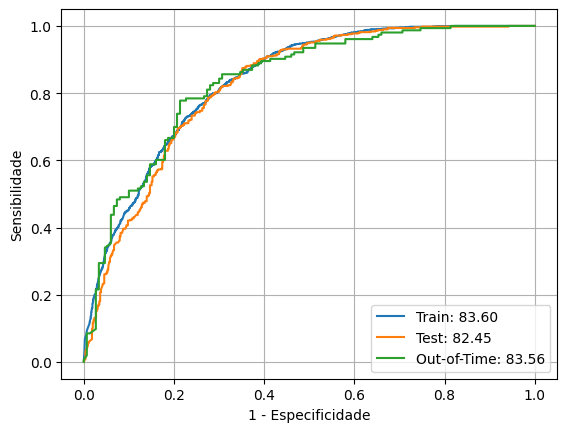

In [128]:
# Plotando a curva roc

plt.plot(roc_train[0], roc_train[1])
plt.plot(roc_test[0], roc_test[1])
plt.plot(roc_oot[0], roc_oot[1])
plt.grid(True)
plt.ylabel('Sensibilidade')
plt.xlabel('1 - Especificidade')
plt.legend([
    f"Train: {100*auc_train:.2f}",
    f"Test: {100*auc_test:.2f}",
    f"Out-of-Time: {100*auc_oot:.2f}"  
])
plt.show()

## Exportando o modelo e criando novas predições

In [ ]:
# Forma manual

model_df = pd.Series({
    "model":model_pipeline,
    "features":best_features
})
model_df.to_pickle("model.pkl")

# Mas o ideal é fazer pelo mlflow

### Jogar no streamlit e desenhar a arquitetura mostrando o uso do mlflow